## Practical Session - Unsupervised Learning

This Practical session is about unsupervised learning. We will use the dimensionality reduction and clustering techniques presented this morning to analyze both toy examples and real images.

Please answer the questions and complete the code where you see (`XXXXXXXXXX`). 

First let's load the functions we will use

In [ ]:
import numpy as np
import numpy.matlib
import math
import matplotlib.pyplot as plt
plt.close('all')

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA

from scipy import linalg as LA
from scipy.stats import ortho_group
from scipy.stats import gennorm

from skimage.io import imread
from skimage.transform import resize
from skimage.transform import rescale
from skimage import img_as_bool

from mpl_toolkits.axes_grid1 import AxesGrid
from scipy.spatial.distance import dice
from skimage.measure import find_contours

from scipy.io import loadmat

# I - Dimensionnality reduction: NMF

## I - 1) Dataset

You will first work on the same face images as during the practical work 1.

Load the original images present in the files *'YaleB\_32x32.mat'*. This is a small part of the freely available Extended Yale Face Database B downloaded from http://www.cad.zju.edu.cn/home/dengcai/Data/FaceData.html. It contains 2414 cropped images resized to 32x32 pixels. Every image is represented as a vector 1x1024 and all images are stacked in a matrix called data. There are 38 subjects with around 64 near frontal images per individual under different illumination conditions. Once loaded and normalised the data, such that the pixels are between 0 and 1, you can plot images using the function *'imshow'*.

**Goal**

The goal of this part is to evaluate the performance of the dimensionality reduction techniques presented this morning for face recognition. We divide the data-set into two parts, training and test. For every dimensionality reduction technique, you will first extract a set of basis images from your training data-set. Then, you will project the test subjects in this new basis and use the nearest neighbor algorithm to evaluate the performance of the dimensionality reduction technique. 

Let's load the data and define a function to plot the faces. If you do not remember how the dataset is constituted, please refer to the previous practical work.

In [ ]:
if 'google.colab' in str(get_ipython()):
  # from google_drive_downloader import GoogleDriveDownloader as gdd
  # gdd.download_file_from_google_drive(file_id='1rgICXtcIAgDqSoHnNXNZMD_iNABF3RZA',
  # dest_path='./YaleB_32x32.mat')
  from google.colab import drive
  drive.mount('/content/drive')
else:
  print('You are not using Colab. Please define working_dir with the absolute path to the folder where you downloaded the data')

# Please modify working_dir only if you are using your Anaconda (and not Google Colab)
Working_directory="./drive/MyDrive/2022-2A/IMA205/"


x = loadmat(Working_directory + 'YaleB_32x32.mat')
data=x['fea']
d=data.shape[1] # number of pixels of the images
subjectIndex=x['gnd'] # we have one index per subject
maxValue = np.max(np.max(data)) # max intensity value
data = data/maxValue; # Scale pixels to [0,1]

Ns=len(np.unique(subjectIndex)); # Number subjects
Is=round(len(subjectIndex)/Ns) # Number images per subject (on average, not the same number for every subject)
r=int(np.sqrt(d)) # number rows of each image
c=r # number columns of each image, equal to row since images are square

print('There are', data.shape[0], 'facial images and each image has', d, 'pixels' )
print('There are', Ns, 'different subjects and each subject has on average', Is, 'images')

Xtrain, Xtest, Id_Train, Id_Test = train_test_split(data,subjectIndex,test_size=0.20,stratify=subjectIndex, random_state=44)
Xctest=Xtest-np.mean(Xtest,axis=0) # centering
Xctrain=Xtrain-np.mean(Xtrain,axis=0) # centering

def plotFaces(data,r,c,ncol=2,N=0,indeces=None,title=None):
    # data: each face is a row in data
    # r,c = number of rows and columns of each image
    # n_col = number of columns for subplots
    # N = random images to plot (used only if indeces is empty)
    # indeces = indeces of images to plot
    # title = title of the plot

   
    if indeces is None:
        if N==0:
            raise NameError('You should define either N or indeces')
        else:
            print('Use N random subjects')
            indeces=np.random.randint(0,data.shape[0],(N,1))
            
    nrow=math.ceil(len(indeces)/ncol)
    
    fig=plt.figure(figsize=(17, 6))
    plt.suptitle(title, size=16)
    for i, index in enumerate(indeces):
        fig.add_subplot(nrow, ncol, i+1)
        plt.imshow(np.resize(data[index,:],(r,c)).T,origin='upper',cmap='gray')
        plt.xticks(())
        plt.yticks(())

Mounted at /content/drive
There are 2414 facial images and each image has 1024 pixels
There are 38 different subjects and each subject has on average 64 images


## I - 2) NNMF

Here you will test Non-negative Matrix factorization. The basis images of the training are in the matrix $W_{train}$ and the scores (or coefficients) to test the performance in $H_{train}$. The test scores are computed as $H_{test}=W_{train}^{-1}X_{test}$.

**Question**

1. Use the scikit-learn implementation to test the performance.
2. Plot the basis images and compare them with respect to the basis images obtained using PCA and ICA in the last practical work. What can you say ?
3. What about the performances of NNMF, i.e. computational time and classification accuracy ? Is it better or worse than the other methods ? Why ?
4. Do you think that it is a good idea to use a PCA before the NMF algorithm? Why?

**Answers:**

1. The test performance was of $87\%$, compared to $71\%$ for PCA and $92\%$ for ICA. 
2. It can be observed that the basis images correspond to different parts of the face, which makes sense considering that since $H \geq 0$, each observation is a purely additive combination of the non-negative basis images. This makes the basis images much easier to interpret then those of PCA and ICA.
3. NNMF was quicker then ICA and slower then PCA but yielded very accurate results, close to those of ICA, making it a good choice. I would say NNMF has an advantage over the other methods because it makes no prior assumptions about the data, in contrast to PCA and ICA, furthermore, it accounts for Gaussian noise, making it a more robust method.
4. I don't think it would be useful to use PCA before the NNMF algorithm, because both algorithms have more of less the same objective, of decomposing the data base into a matrix multiplication and thus finding a basis for the images of reduced dimensionality. And the computational cost of NNMF isn't high enough to require a prior dimensionality reduction.

NNMF uses  100  features
Percentage of correct answer using NNMF is  0.8737060041407867


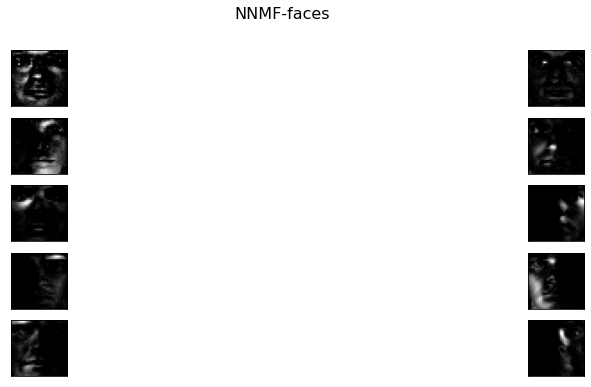

In [ ]:
# NNMF (scikit-learn implementation)
Ncomponents=100
model = NMF(init='random', solver='mu', n_components=Ncomponents, tol=1e-3,max_iter=300, random_state=0)
WtrainNNMF = model.fit_transform(Xtrain.T)
HtrainNNMF = model.components_

plotFaces(WtrainNNMF.T,r,c,ncol=2,indeces=np.arange(0,10,1),title='NNMF-faces') 

# to invert the matrix you can use the function LA.pinv
Htest_nnmf = np.dot(LA.pinv(WtrainNNMF),Xtest.T)

print('NNMF uses ', Ncomponents, ' features')

# Score
NN=KNeighborsClassifier(n_neighbors=1)
NN.fit(HtrainNNMF.T,Id_Train.ravel())
print('Percentage of correct answer using NNMF is ', NN.score(Htest_nnmf.T,Id_Test))

Implement your own implementation in `NNMFLecture` following the lecture slides. Complete the missing lines (`XXXXXXXXXX`) 

In [ ]:
def NNMFLecture(X,r=None,N_Iter=1000,tolerance=1e-3,plot_evolution=1):
    '''
    Inputs: 
    %           X: is a [dxN] matrix. Every column (x) is an observation and every
    %           row consists of features.
    %
    %           r: size of the matrices W and H
    %
    %           (Optional) N_Iter: maximum number of iterations
    %
    %           (Optional) tolerance: convergence criteria threshold
    %
    %           (Optional) plot_evolution: plot evolution convergence criteria
    %
    % Outputs:
    %           W: is a [d x r] matrix containing the basis images in its
    %           columns
    %           
    %           H: is a [r x N] matrix containing the loadings (h) in its columns
    %           of the linear combination: x=Wh 
    %
  '''
    if r is None:
        r=X.shape[0]
        
    # Test for positive values
    if np.min(X) < 0:
        raise NameError('Input matrix X has negative values !')      

    # Size
    d,N=X.shape
   
    # Initialization
    W=np.random.rand(d,r)
    H=np.random.rand(r,N)
    
    # parameters for convergence
    k = 0
    delta = np.inf
    eps=np.finfo(float).eps
    evolutionDelta=[]
 
    while delta > tolerance and k < N_Iter:
        
        # multiplicative method      
        
        XH=np.dot(X,H.T)
        HH=np.dot(H,H.T)
        for i in range(20):
            W *= np.divide(XH, W@HH + eps)

        H *= np.divide(W.T@X, W.T@W@H + eps)

        # Convergence indices
        k = k + 1           
        diff=X-np.dot(W,H)     
        #delta = np.sqrt(np.sum(diff**2)) / np.sqrt(np.sum(X**2)) # |X-WH|_2 / |X|_2
        delta = LA.norm(diff,'fro') / LA.norm(X,'fro') # sqrt(trace(diff'*diff)) / sqrt(trace(X'*X))
        evolutionDelta.append(delta)
        
        if k==1 or k%100==0:
            print('Iteration NNMF number ', k, ' out of ', N_Iter , ', delta = ', delta, ', error (norm delta): ', LA.norm(diff))
     
    if k==N_Iter:
        print('Maximum number of iterations reached ! delta = ', delta)
    else:
        print('Convergence achieved ( delta = ', delta, ') in ', k, ' iterations')
    
    if plot_evolution==1:
        plt.figure(figsize=(6, 6))
        plt.plot(range(k),evolutionDelta,'bx--', linewidth=4, markersize=12)  
        plt.title('Evolution of error - NNMF')
        plt.show()
    
    return W,H

Iteration NNMF number  1  out of  300 , delta =  0.530986986472642 , error (norm delta):  273.32920315172436
Iteration NNMF number  100  out of  300 , delta =  0.15763157981599793 , error (norm delta):  81.14193982204878
Iteration NNMF number  200  out of  300 , delta =  0.14999427313347338 , error (norm delta):  77.21058368161478
Iteration NNMF number  300  out of  300 , delta =  0.14735057124445564 , error (norm delta):  75.84971995217353
Maximum number of iterations reached ! delta =  0.14735057124445564


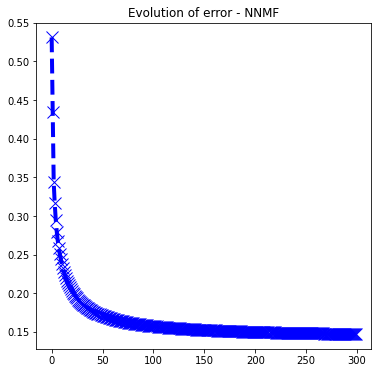

NNMF uses  100  features
Percentage of correct answer using NNMF is  0.8778467908902692


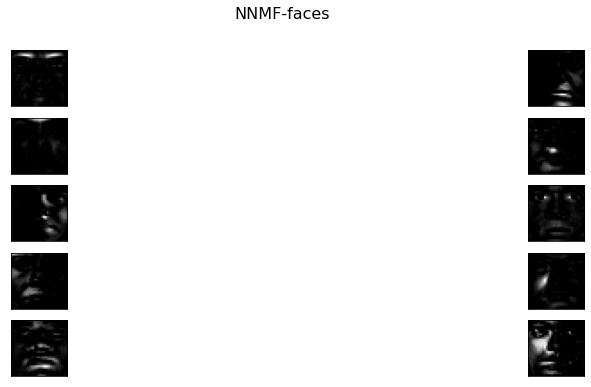

In [ ]:
# NNMF (your own implementation)
Ncomponents=100
Wtrain_nnmf,Htrain_nnmf = NNMFLecture(Xtrain.T,r=Ncomponents,N_Iter=300,tolerance=1e-3,plot_evolution=1)
plotFaces(Wtrain_nnmf.T,r,c,ncol=2,indeces=np.arange(0,10,1),title='NNMF-faces') 

# to invert the matrix you can use the function LA.pinv
Htest_nnmf = np.dot(LA.pinv(Wtrain_nnmf),Xtest.T)

print('NNMF uses ', Ncomponents, ' features')

# Score
NN.fit(Htrain_nnmf.T,Id_Train.ravel())
print('Percentage of correct answer using NNMF is ', NN.score(Htest_nnmf.T,Id_Test))

**Questions:**

1. What do you observe?
2. What is the limitation of doing an inversion for Htest_nnmf? How would you avoid that?

**Answers:**

1. The results of the implementation of NNMK are similar to those of the sklearn method, the basis images correspond to different parts of a face and the classification accuracy was high.

2. A limitation of doing an inversion to compute Htest_nnmf is the fact that matrix inversion can be a costly operation, specially if the matrix coefficients are small. To avoid that, one could impose a orthogonality constraint on $W$ and so the inverse of $W$ would be simply $W^T$.

## I-3) ICA and NNMF in the presence of noise

We will now compare ICA and NNMF results in the presence of noise within the dataset. Please note that during the class on ICA, the dataset $X$ was assumed to be noiseless: we were looking for a decomposition such that $X = AS$, and not $X = AS + N$, where $N$ would be a noise term.

**Questions:**

1. How do you think that ICA might behave in the presence of noise? You might in particular consider the case of a Gaussian noise N.
2. On the other hand, do you think that NNMF behaves better? If so, for what kind of noises?

**Answers:**

1. I think that ICA is negatively affected by noise because its formulation does not account for noise, in particular, Gaussian noise may be especially harmful since the goal of ICA is to find a linear representation of non-Gaussian data.

2. I think that NNMF behaves better in the presence of noise because the optimization problem that it solves accounts for noise, in particular, the norm being minimized can be chosen to account for different types of noise, for example, the L2-norm assumes additive Gaussian noise.

In the following, we will try to compare the behavior of ICA and NNMF in the presence of noise. Do the following:
- add some Gaussian noise to both the training and the testing dataset.
- apply both NNMF and ICA (the second architecture you implemented in the previous practical work) on the noisy dataset. **For both, you can use 250 features.**
- use the NN algorithm to classify the images from the features extracted from ICA and NNMF.

Redo the same for different noise levels. Plot a curve of the classification accuracy when either ICA or NNMF are used as pre-processing steps. Comment your results.

**Answers:**

As expected, noise hurt the performance of ICA more then that of NNMF, however I would have expected the difference to be more expressive. ICA might not have been much impacted due to the fact that, in the second architecture, the data is preprocessed using PCA.

In [ ]:
sigmaTab = np.array([0,0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.5])

scoreNMF = np.zeros(len(sigmaTab))
scoreICA = np.zeros(len(sigmaTab))
scoreICA1 = np.zeros(len(sigmaTab))

for i in range(len(sigmaTab)):
    # Data generation
    XtrainNoise = Xtrain + np.random.normal(scale=sigmaTab[i], size=Xtrain.shape)
    XtestNoise = Xtest + np.random.normal(scale=sigmaTab[i], size=Xtest.shape)
    XtrainNoise = (XtrainNoise - XtrainNoise.min())/(XtrainNoise.max() - XtrainNoise.min())
    XtestNoise = (XtestNoise - XtestNoise.min())/(XtestNoise.max() - XtestNoise.min())
    
    ##################
    # NMF
    Ncomponents=250
    model = NMF(init='random', solver='mu', n_components=Ncomponents, tol=1e-3,max_iter=300, random_state=0)
    WtrainNNMF = model.fit_transform(XtrainNoise.T)
    HtrainNNMF = model.components_

    # to invert the matrix you can use the function LA.pinv
    Htest_nnmf = np.dot(LA.pinv(WtrainNNMF),XtestNoise.T)

    print('NNMF uses ', Ncomponents, ' features')

    # Score
    NN=KNeighborsClassifier(n_neighbors=1)
    NN.fit(HtrainNNMF.T,Id_Train.ravel())
    scoreNMF[i] = NN.score(Htest_nnmf.T,Id_Test)
    print('Percentage of correct answer using NNMF is ', scoreNMF[i])

    ##################
    ## ICA
    # Second architecture (scikit-learn implementation)
    XctrainNoise = XtrainNoise - XtrainNoise.mean(axis=0, keepdims=True)
    XctestNoise = XtestNoise - XtestNoise.mean(axis=0, keepdims=True)

    pca2 = PCA(random_state=1) 
    Ytrain2 = pca2.fit_transform(XctrainNoise)
    Ytest2 = pca2.transform(XctestNoise)
    U2 = pca2.components_.T
    D2 = (pca2.singular_values_)**2/(XctrainNoise.shape[0]-1) # computation of the eigenvalues

    # We use the PCA projection to speed up results
    # Threshold defined as 99% of the variability
    # PCAComp2 = -1
    # cum_explained2 = np.cumsum(pca2.explained_variance_ratio_)/np.sum(pca2.explained_variance_ratio_)
    # for i, v in enumerate(cum_explained2):
    #   if v > 0.99:
    #     PCAComp2 = i+1
    #     break

    PCAComp2 = Ncomponents
    # Selection of the eigenvectors 
    L2 = U2[:,0:PCAComp2]
    Ytrain992 = Ytrain2[:,:PCAComp2]
    Ytest992 = Ytest2[:,:PCAComp2]

    # Apply ICA
    ICA2 = FastICA(whiten=True, fun='exp', max_iter=20000, tol=0.00001, random_state=1)
    output2 = ICA2.fit_transform(Ytrain992) # ICA2.fit_transform(X seems to compute the decomposition of X.T
    
    input = Ytrain992
    K = ICA2.whitening_
    input_mean = ICA2.mean_
    WK = ICA2.components_
    W = ICA2._unmixing
    invWK = ICA2.mixing_
    S = output2

    # Score
    NN2 = KNeighborsClassifier(n_neighbors=1)
    NN2.fit( (WK@(Ytrain992 - Ytrain992.mean(axis=0, keepdims=True)).T).T, Id_Train.ravel() )
    scoreICA[i] = NN2.score( (WK@(Ytest992 - Ytest992.mean(axis=0, keepdims=True)).T).T,Id_Test.ravel() )
    print('Percentage of correct answer using ICA arch.2 is ', scoreICA[i])

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 300 reached. Increase it to improve convergence.
  warnings.warn(


NNMF uses  250  features
Percentage of correct answer using NNMF is  0.8881987577639752
Percentage of correct answer using ICA arch.2 is  0.9213250517598344


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 300 reached. Increase it to improve convergence.
  warnings.warn(


NNMF uses  250  features
Percentage of correct answer using NNMF is  0.9047619047619048
Percentage of correct answer using ICA arch.2 is  0.8944099378881988


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 300 reached. Increase it to improve convergence.
  warnings.warn(


NNMF uses  250  features
Percentage of correct answer using NNMF is  0.8695652173913043
Percentage of correct answer using ICA arch.2 is  0.7867494824016563


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 300 reached. Increase it to improve convergence.
  warnings.warn(


NNMF uses  250  features
Percentage of correct answer using NNMF is  0.7888198757763976
Percentage of correct answer using ICA arch.2 is  0.7184265010351967


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 300 reached. Increase it to improve convergence.
  warnings.warn(


NNMF uses  250  features
Percentage of correct answer using NNMF is  0.6128364389233955
Percentage of correct answer using ICA arch.2 is  0.4824016563146998


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 300 reached. Increase it to improve convergence.
  warnings.warn(


NNMF uses  250  features
Percentage of correct answer using NNMF is  0.422360248447205
Percentage of correct answer using ICA arch.2 is  0.3064182194616977


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 300 reached. Increase it to improve convergence.
  warnings.warn(


NNMF uses  250  features
Percentage of correct answer using NNMF is  0.2815734989648033
Percentage of correct answer using ICA arch.2 is  0.2732919254658385


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 300 reached. Increase it to improve convergence.
  warnings.warn(


NNMF uses  250  features
Percentage of correct answer using NNMF is  0.14285714285714285
Percentage of correct answer using ICA arch.2 is  0.14906832298136646


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 300 reached. Increase it to improve convergence.
  warnings.warn(


NNMF uses  250  features
Percentage of correct answer using NNMF is  0.08695652173913043
Percentage of correct answer using ICA arch.2 is  0.06832298136645963


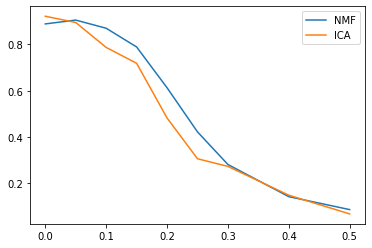

In [ ]:
plt.figure(),plt.plot(sigmaTab,scoreNMF)
plt.plot(sigmaTab,scoreICA)
plt.legend(['NMF','ICA'])

In [ ]:
# # Second architecture (scikit-learn implementation)
# pca2 = PCA(random_state=1) 
# Ytrain2 = pca2.fit_transform(Xctrain)
# Ytest2 = pca2.transform(Xctest)
# U2 = pca2.components_.T
# D2 = (pca2.singular_values_)**2/(Xctrain.shape[0]-1) # computation of the eigenvalues

# # We use the PCA projection to speed up results
# # Threshold defined as 99% of the variability
# PCAComp2 = -1
# cum_explained2 = np.cumsum(pca2.explained_variance_ratio_)/np.sum(pca2.explained_variance_ratio_)
# for i, v in enumerate(cum_explained2):
#   if v > 0.99:
#     PCAComp2 = i+1
#     break

# # Selection of the eigenvectors 
# L2 = U2[:,0:PCAComp2]
# Ytrain992 = Ytrain2[:,:PCAComp2]
# Ytest992 = Ytest2[:,:PCAComp2]

# # Apply ICA
# ICA2 = FastICA(whiten=True, fun='exp', max_iter=20000, tol=0.00001, random_state=1)
# output2 = ICA2.fit_transform(Ytrain992) # ICA2.fit_transform(X) seems to compute the decomposition of X.T

In [ ]:
# input = Ytrain992
# K = ICA2.whitening_
# input_mean = ICA2.mean_
# WK = ICA2.components_
# W = ICA2._unmixing
# invWK = ICA2.mixing_
# S = output2

In [ ]:
# input.shape

In [ ]:
# input_mean.shape

In [ ]:
# inputc = input - input_mean

In [ ]:
# uncor = lambda M: np.sum( np.abs( np.identity( M.shape[0] ) - 1/(M.shape[1]-1)*(M-M.mean(axis=0, keepdims=True))@(M-M.mean(axis=0, keepdims=True)).T ) )

In [ ]:
# uncor(S.T)

In [ ]:
# eq = lambda M, N: np.sum( np.abs( M - N ) )

In [ ]:
# eq( S, inputc@K.T@W.T )

In [ ]:
# eq( S.T, WK@inputc.T )

In [ ]:
# eq( invWK@(S.T), inputc.T )

In [ ]:
# plotFaces((L2@(invWK)).T,r,c,ncol=2,indeces=np.arange(0,10,1),title='ICA - first architecture - basis images') 

In [ ]:
# Score
# NN2 = KNeighborsClassifier(n_neighbors=1)
# NN2.fit( (WK@(Ytrain992 - Ytrain992.mean(axis=0, keepdims=True)).T).T, Id_Train.ravel() )
# print('Percentage of correct answer using ICA arch.2 is ', NN2.score( (WK@(Ytest992 - Ytest992.mean(axis=0, keepdims=True)).T).T,Id_Test.ravel() ))

# II - Clustering: K-means

We will now work on the K-means algorithm. First, the K-means algorithm will be used to cluster the toy examples datasets of the first practical work. Then, it will be used to segment real images.

## II - 1) Toy examples

Let us first define the toy examples.

In [ ]:
def generate_scenario(scenario=3, n_samples0 = 100, n_samples1 = 30):

    y = np.concatenate((np.zeros([n_samples0,1]) , np.ones([n_samples1,1])) , axis=0)

    if scenario == 1: 
        # Separate Gaussian
        mean0 = [2, 3]
        mean1 = [12, 14]
        cov0 = [[1, 1.5], [1.5 ,3]]
        cov1 = 2 ** 2 * np.eye(2)
        X0 = np.random.multivariate_normal(mean0, cov0, n_samples0, check_valid='raise')
        X1 = np.random.multivariate_normal(mean1, cov1, n_samples1, check_valid='raise')
        
    elif scenario == 2:
        # Overlapping Gaussian
        mean0 = [2, 3]
        mean1 = [5, 7]
        cov0 = [[1, 1.5], [1.5 ,3]]
        cov1 = [[2, 3], [3 ,6]]
        X0 = np.random.multivariate_normal(mean0, cov0, n_samples0, check_valid='raise')
        X1 = np.random.multivariate_normal(mean1, cov1, n_samples1, check_valid='raise')
        
        
    elif scenario == 3:
        # Overlapping Gaussian
        mean0 = [0, 0]
        mean1 = [0, 0]
        cov0 = [[50, 15], [15, 6]]#cov0 = [[50, 4], [4, 2]]
        cov1 = [[2, 0], [0 ,50]]#cov1 = [[2, 0], [0 ,50]]
        X0 = np.random.multivariate_normal(mean0, cov0, n_samples0, check_valid='raise')
        X1 = np.random.multivariate_normal(mean1, cov1, n_samples1, check_valid='raise')
        
        
    elif scenario == 4:
        # Circles
        # 1 circle
        angle0=np.linspace(0, 2 * np.pi, n_samples0);
        X0=np.vstack((8*np.cos(angle0) , 8*np.sin(angle0))).T
        
        # 2 circle
        angle1=np.linspace(0, 2 * np.pi, n_samples1);
        X1=np.vstack((2*np.cos(angle1) , 2*np.sin(angle1))).T

    return X0,X1,y

def plotResults(X0=None,X1=None,y=None,U=None,Y=None,const=1,title=''):

    X=np.concatenate((X0,X1),axis=0)
    
    N0=np.sum(y==0)
    N1=np.sum(y==1)
    
    fig=plt.figure(figsize=(17, 6))
    
    ax  = fig.add_subplot(1, 3, 1)
    plt.scatter(X0[:,0],X0[:,1],c='r', label='Class 0')
    plt.scatter(X1[:,0],X1[:,1],c='b', label='Class 1')
    if U is not None:
        average=X.mean(axis=0)
        sd=LA.norm(X.std(axis=0))
        u0=U[:,0]*const*sd;
        u1=U[:,1]*const*sd;
        plt.plot([average[0]-u0[0], average[0]+u0[0]],[average[1]-u0[1], average[1]+u0[1]], c='g',linewidth=4, label='C 1' )
        plt.plot([average[0]-u1[0], average[0]+u1[0]],[average[1]-u1[1], average[1]+u1[1]], c='k',linewidth=4, label='C 2' )
        plt.title('Original data and components')
    else:
        plt.title('Original data')
    plt.legend()
    
    ax  = fig.add_subplot(1, 3, 2)
    plt.scatter(Y[np.where(y == 0)[0],0], np.zeros((N0,1)), c='r', s=3, marker='o', label='Class 0')
    plt.scatter(Y[np.where(y == 1)[0],0], np.zeros((N1,1)), c='b', s=3, marker='x', label='Class 1')
    ax.set_title(title + '\n Scores on 1st component')
    
    ax  = fig.add_subplot(1, 3, 3)
    plt.scatter(Y[np.where(y == 0)[0],1], np.zeros((N0,1)), c='r', s=3, marker='o', label='Class 0')
    plt.scatter(Y[np.where(y == 1)[0],1], np.zeros((N1,1)), c='b', s=3, marker='x', label='Class 1')
    plt.legend()
    plt.title('Scores on 2nd component')
    
    plt.show()
    
    
def frontiere(model, X, y, step=50):

    labels = np.unique(y)
 
    min_tot = np.min(X)
    max_tot = np.max(X)
    delta = (max_tot - min_tot) / step
    xx, yy = np.meshgrid(np.arange(min_tot, max_tot, delta),
                         np.arange(min_tot, max_tot, delta))
    z = np.array( model.predict(np.c_[xx.ravel(), yy.ravel() ]) )
    z = z.reshape(xx.shape)
   
    plt.imshow(z, origin='lower', extent=[min_tot, max_tot, min_tot, max_tot],
               interpolation="mitchell", cmap='RdBu')
    
    cbar = plt.colorbar(ticks=labels)
    cbar.ax.set_yticklabels(labels)

    plt.scatter(X[np.where(yKmeans == 0)[0],0],X[np.where(yKmeans == 0)[0],1],c='r', label='Predicted class 0')
    plt.scatter(X[np.where(yKmeans == 1)[0],0],X[np.where(yKmeans == 1)[0],1],c='b', label='Predicted class 1') 
    
    plt.ylim([min_tot, max_tot])
    plt.xlim([min_tot, max_tot])
    

Now, create the data we will use.

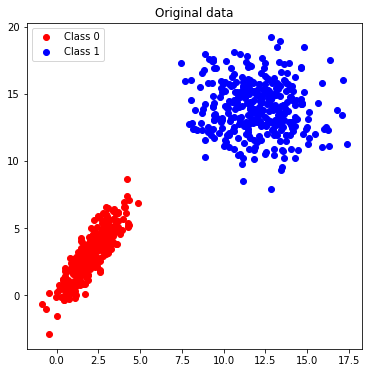

In [ ]:
## Choose the scenarioIndex (value between 1 and 4)
scenarioIndex = 1
##

X0,X1,y = generate_scenario(scenario=scenarioIndex, n_samples0 = 350, n_samples1 = 350)
X=np.concatenate((X0,X1),axis=0)

plt.figure(figsize=(6, 6))
plt.scatter(X0[:,0],X0[:,1],c='r', label='Class 0')
plt.scatter(X1[:,0],X1[:,1],c='b', label='Class 1')
plt.title('Original data')
plt.legend()
plt.show()

Use the K-means to find the different clusters in the dataset. K-means will be used on X and we will check whether it can well separate the two classes. 


**Question:**
1. Does it work well in all scenarios ? Why ? Is it always easy to define the correct number of clusters ?

**Answers:**

In its standard form, without using the Kernel trick and using euclidean distance, K-means works well on scenarios that respect its assumptions, i.e, the clusters should be isotropic and of similar variance. 

For instance, K-means works well in the first scenario, where, even though the two classes have distinct variances, they are separated enough to be correctly divided into two clusters. It also works well in the second scenario, but it missclassifies the points that are in the intersection of the two classes. The third scenario cannot be correctly classified with only two clusters, using four cluster each arm is assigned to one them, however the data would be classified into fours labels instead of two. It also does not work well on the fourth scenario, where it would be necessary to use the Kernel trick. 

If we don't have enough prior knowledge about the data it may be hard to define the correct number of clusters.

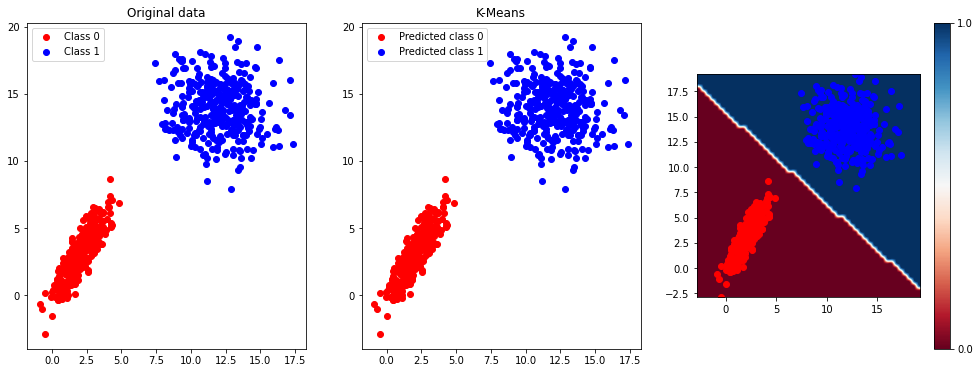

In [ ]:
## K-means
Ncluster= 2 # choose a number of clusters
kmeans=KMeans(n_clusters=Ncluster) 
yKmeans=kmeans.fit_predict(X)

plt.figure(figsize=(17, 6))
plt.subplot(131)
plt.scatter(X[np.where(y == 0)[0],0],X[np.where(y == 0)[0],1],c='r', label='Class 0')
plt.scatter(X[np.where(y == 1)[0],0],X[np.where(y == 1)[0],1],c='b', label='Class 1')
plt.title('Original data')
plt.legend()

plt.subplot(132)
plt.scatter(X[np.where(yKmeans == 0)[0],0],X[np.where(yKmeans == 0)[0],1],c='r', label='Predicted class 0')
plt.scatter(X[np.where(yKmeans == 1)[0],0],X[np.where(yKmeans == 1)[0],1],c='b', label='Predicted class 1')
plt.title('K-Means')
plt.legend()

plt.subplot(133)
frontiere(kmeans, X, y, step=50)

plt.show()

Now, implement your own K-means using the Lloyd's algorithm.

In [ ]:
def KMeansLecture(X, k=2, tol=1e-4):
    """
    k-Means Clustering of the data set with k centroids

    Parameters
    -----------
    `k`: k-Means parameter (Number of centroids)
    `x`: Input data [N x d]

    Returns
    -------
    `labels`: Assigned clusters for each data point
    `centroids`: Coordinates of the centroids
    """

    # randomly initialize centroids
    N = X.shape[0]
    idx_centroids = np.random.choice(N, k, replace=False)
    C = X[ idx_centroids ]
    
    converged = False
    it = 1
    Gprev = G = 0 # within-cluster variation will be used to determine convergence
    while not converged:
        # identify clusters
        labels = []
        G = 0
        for x in X:
            d = np.linalg.norm( x-C, axis=1 ) # distance to centroids
            c = np.argmin( d ) # determine closest centroid
            G += d[c]**2
            labels.append( c )
        
        # update centroids
        labels = np.array(labels)        
        for i in range(k):
            Ci = X[ labels == i ] # data points associated to label i
            C[i] = np.mean(Ci, axis=0) # new centroid
            
        if np.abs( G-Gprev ) < tol:
            converged = True
        
        Gprev = G
            
        it += 1
    
    labels = []
    for x in X:
        d = np.linalg.norm( x-C, axis=1 )
        c = np.argmin( d )
        labels.append( c )
    
    return np.array(labels), C
    # return yKmeans,muTab

Now, test your K-means algorithm.

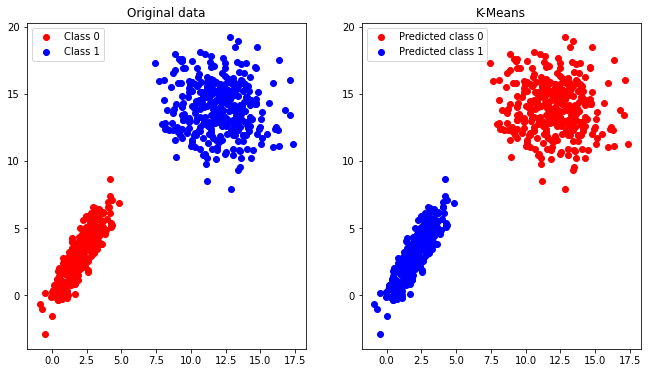

In [ ]:
## K-means
Ncluster= 2 # choose a number of clusters
yKmeans,muTab = KMeansLecture(X,k=Ncluster,tol=1e-4)

plt.figure(figsize=(17, 6))
plt.subplot(131)
plt.scatter(X[np.where(y == 0)[0],0],X[np.where(y == 0)[0],1],c='r', label='Class 0')
plt.scatter(X[np.where(y == 1)[0],0],X[np.where(y == 1)[0],1],c='b', label='Class 1')
plt.title('Original data')
plt.legend()

plt.subplot(132)
plt.scatter(X[np.where(yKmeans == 0)[0],0],X[np.where(yKmeans == 0)[0],1],c='r', label='Predicted class 0')
plt.scatter(X[np.where(yKmeans == 1)[0],0],X[np.where(yKmeans == 1)[0],1],c='b', label='Predicted class 1')
plt.title('K-Means')
plt.legend()

## II-2) K-means for skin lesion segmentation


In this section, you will use the K-means to segment skin lesion images. You will use two images from the ISIC dataset (www.isic-archive.com), one nevus and one melanoma with their respetive manual segmentation. 

**Goal**

The goal of this section is to delineate the contours (i.e. segment) of the skin lesions using k-means. 

Let's first load the data. The images are rescaled so that the computations are faster.

(-0.5, 374.5, 280.5, -0.5)

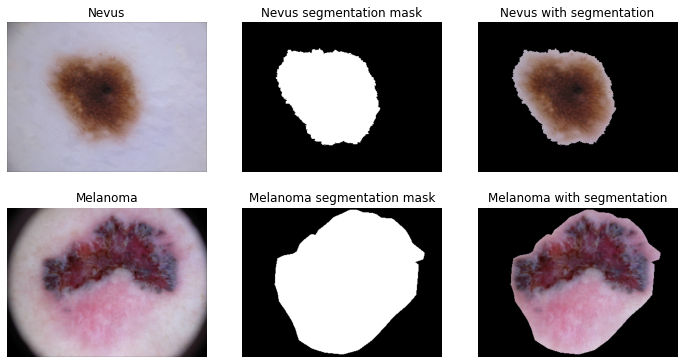

In [ ]:
if 'google.colab' in str(get_ipython()):
  from google_drive_downloader import GoogleDriveDownloader as gdd
  gdd.download_file_from_google_drive(file_id='1_TeYzLLDoKbPX4xXAOAM_mQiT2nLHgvp',
  dest_path='./data/nevus.jpg')
  gdd.download_file_from_google_drive(file_id='1iQZdUiuK_FwZ7mik7LB3eN_H_IUc5l7b',
  dest_path='./data/nevus-seg.jpg')
  gdd.download_file_from_google_drive(file_id='1yZ46UzGhwO7g5T8397JpewBl6UqgRo5J',
  dest_path='./data/melanoma.jpg')
  gdd.download_file_from_google_drive(file_id='1B2Ol92mBcHN6ah3bpoucBbBbHkPMGC8D',
  dest_path='./data/melanoma-seg.png')
else:
  print('You are not using Colab. Please define working_dir with the absolute path to the folder where you downloaded the data')

# Please modify working_dir only if you are using your Anaconda (and not Google Colab)
Working_directory="./data/" 




# Nevus
nevus = imread(Working_directory + 'nevus.jpg')
nevus=nevus[2:-2,2:-2,:] # remove border (it contains artifacts)
nevusMask = imread(Working_directory + 'nevus-seg.jpg')
nevusMask=nevusMask[2:-2,2:-2] # remove border (it contains artifacts)
# We rescale to speed up computations
nevus = rescale(nevus, 0.25,multichannel=True, anti_aliasing=True)
# We need all these options to preserve the binary values
nevusMask = rescale(nevusMask, 0.25, anti_aliasing=False, order=0,  preserve_range=True)
nevusMask_boolean = (nevusMask/255).astype(np.uint8) # To get uint8
nevusMask_expand = np.expand_dims(nevusMask_boolean, axis=2) # To have a 3 channels boolean mask

# Melanoma
melanoma = imread(Working_directory + 'melanoma.jpg')
melanoma=melanoma[2:-2,2:-2,:] # remove border (it contains artifacts)
melanomaMask = imread(Working_directory + 'melanoma-seg.png')
melanomaMask=melanomaMask[2:-2,2:-2] # remove border (it contains artifacts)
melanoma = rescale(melanoma, 0.25,multichannel=True, anti_aliasing=True)
melanomaMask = rescale(melanomaMask, 0.25, anti_aliasing=False, order=0,  preserve_range=True)
melanomaMask_boolean = (melanomaMask/255).astype(np.uint8) 
melanomaMask_expand = np.expand_dims(melanomaMask_boolean, axis=2)

fig = plt.figure(figsize=(12, 12))
grid = AxesGrid(fig, 111,
                nrows_ncols = (2, 3),
                axes_pad = 0.5)
grid[0].imshow(nevus)
grid[0].set_title('Nevus')
grid[0].axis('off')
grid[1].imshow(nevusMask_boolean,cmap='gray')
grid[1].set_title('Nevus segmentation mask')
grid[1].axis('off')
grid[2].imshow(nevusMask_expand*nevus)
grid[2].set_title('Nevus with segmentation')
grid[2].axis('off')
grid[3].imshow(melanoma)
grid[3].set_title('Melanoma')
grid[3].axis('off')
grid[4].imshow(melanomaMask_boolean,cmap='gray')
grid[4].set_title('Melanoma segmentation mask')
grid[4].axis('off')
grid[5].imshow(melanomaMask_expand*melanoma)
grid[5].set_title('Melanoma with segmentation')
grid[5].axis('off')



**Questions**

1. Before running K-means, please answer this question. How many classes $K$ should you look for ? Would you use the same $K$ for both images ? Why ?

2. Run the following code for both images. Try to choose different channels (among the channels Red, Green and Blue) and different number of clusters $K$. Which is the best choice in terms of channel and number of classes ? You can use the [Dice score](https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient) to quantitatively compare your mask and the manual segmentation. Comment the results with respect to the previous answer.

The dice score (or dice similarity) between two binary masks is defined as $\frac{2TP}{2TP + FP + FN}$ and it ranges between 0 (completely different) and 1 (perfectly equal).

3. Propose a way to automatically select the class (or unions of classes) representing the skin lesion and not the skin. (You don't need to implement it, just explain how you would do it).

4. In K-means, we recompute the average at each iteration. The average is not constrained to be one of the original observations. It is usually an *interpolation* of the original observations. How would you change the Lloyd's algorithm to constrain the average to always be one of the original observations ?

**Answers:**

1. Ideally, we are looking for two classes, one for "Lesion" and another for "Not lesion". However, on the *Melanoma* case, there are some black borders, which would be included on the "Lesion" class since the lesion is generally darker, so, unless some post-processing is done on the mask to distinguish the lesion from the black borders, I would use three classes in this case. Therefore I would look for 2 classes for *Nevus* and 3 classes for *Melanoma*.

2. For the *Nevus* image, the best Dice score was obtained for the blue channel and two classes ($DS = 0.83$). For the *Melanoma*, it was best to use the red channel with three classes ($DS = 0.58$), however, we see that part of the lesion is being clustered together with the normal skin, because there is a part of the lesion that is very dark and another that is closer in color to the normal skin.

3. In order to have a general automatic procedure to select the class representing the skin lesion, I would, first of all, crop the images to remove the black borders, then both the *Nevus* and *Melanoma* images could be trated similarly. That being done, I would run K-means with 3 clusters, even though the borders don't pose a problem anymore I would choose 3 clusters because on the case of the melanoma, there is a part of the lesion that is very dark and another that is closer in color to the normal skin, therefore, I expect that with three classes, one class would correspond to the skin, another to the lighter part of the lesion and the third one to darker part of the lesion. With respect to the *Nevus* image, although using two classes suffices, using three classes shouldn't pose a problem since the lesion has much more color variability then the skin, therefore it is expected that one class would correspond to the normal skin and the two others to the lesion. Then, I would compute the average intensity of the region of the image corresponding to each mask and use the union of the two masks of lower average intensity as the skin lesion mask.

4. In order to constrain the average to always be one of the original observations, at each iteration, once the centroid of the cluster is computed, I would find the data point closest to the centroid and assign it to the centroid.

[Channel 2] The dice score is  0.8298550334365603


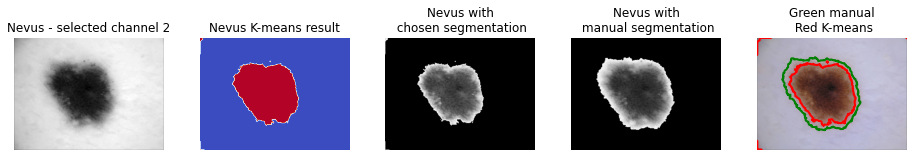

In [ ]:
## NEVUS
# Select a channel (0 for Red, 1 for Green and 2 for Blue)
##
# for channel in [0,1,2]:
channel = 2
nevusB = nevus[:,:,channel] 

# Select the number of cluster K to look for 
K= 2 # choose a number of clusters
##
kmeans=KMeans(n_clusters=K, random_state=1) 
labels=kmeans.fit_predict(nevusB.reshape(-1,1))
labels=np.reshape(labels,(nevusB.shape[0],nevusB.shape[1]))

# Depending on the number of classes K, K-means returns one integer per pixel 
# which indicates the number of the cluster. 
# Choose the integer to use as mask between 0 and K-1
index =1
mask=labels==index ## choose which label should be

contourMask = find_contours(mask, 0.5)
contourManual = find_contours(nevusMask_boolean, 0.5)

# plot the results
fig = plt.figure(figsize=(16, 12))
grid = AxesGrid(fig, 111,
                nrows_ncols = (1, 5),
                axes_pad = 0.5)
grid[0].imshow(nevusB,cmap='gray')
grid[0].set_title('Nevus - selected channel {}'.format(channel))
grid[0].axis('off')
grid[1].imshow(labels,cmap='coolwarm')
grid[1].set_title('Nevus K-means result')
grid[1].axis('off')
grid[2].imshow(mask*nevusB,cmap='gray')
grid[2].set_title('Nevus with\n chosen segmentation')
grid[2].axis('off')
grid[3].imshow(nevusMask_boolean*nevusB,cmap='gray')
grid[3].set_title('Nevus with\n manual segmentation')
grid[3].axis('off')
grid[4].imshow(nevus)
for contour in contourMask:
  grid[4].plot(contour[:, 1], contour[:, 0], linewidth=2, c='r')
for contour in contourManual:
  grid[4].plot(contour[:, 1], contour[:, 0], linewidth=2, c='g')
grid[4].set_title('Green manual\n Red K-means')
grid[4].axis('off')

# Compute the dice score between your mask and the manual segmentation 
print('[Channel {}] The dice score is '.format(channel), 1-dice(nevusMask_boolean.reshape(1,-1), mask.reshape(1,-1)))

The dice score is  0.5827727725296874
The dice score is  0.4254558275410497
The dice score is  0.36809127222410776


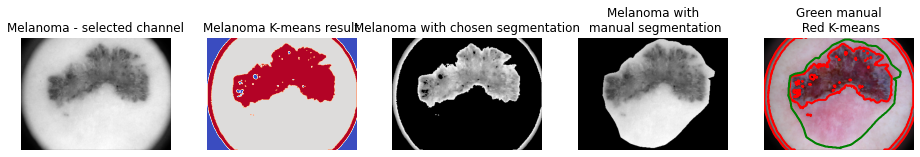

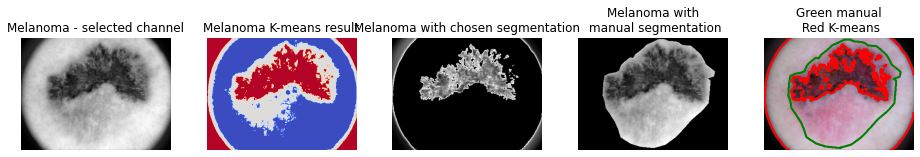

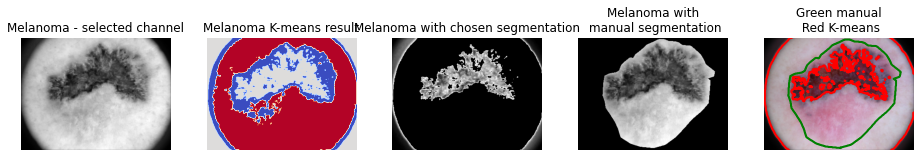

In [ ]:
## MELANOMA
# Select a channel (0 for Red, 1 for Green and 2 for Blue)
channel=0
##
for channel in [0,1,2]:
  melanomaB = melanoma[:,:,channel]

  # Select the number of cluster K to look for 
  K= 3 # choose a number of clusters
  ##
  kmeans=KMeans(n_clusters=K, random_state=1) 
  labels=kmeans.fit_predict(melanomaB.reshape(-1,1))
  labels=np.reshape(labels,(melanomaB.shape[0],melanomaB.shape[1]))

  # Depending on the number of classes K, K-means returns one integer per pixel 
  # which indicates the number of the cluster. 
  # Choose the integer to use as mask between 0 and K-1
  if channel == 0:
    index=2
  elif channel == 1:
    index=2
  else:
    index=1
  
  mask=labels==index ## choose which label should be

  contourMask = find_contours(mask, 0.5)
  contourManual = find_contours(melanomaMask_boolean, 0.5)

  fig = plt.figure(figsize=(16, 12))
  grid = AxesGrid(fig, 111,
                  nrows_ncols = (1, 5),
                  axes_pad = 0.5)
  grid[0].imshow(melanomaB,cmap='gray')
  grid[0].set_title('Melanoma - selected channel')
  grid[0].axis('off')
  grid[1].imshow(labels,cmap='coolwarm')
  grid[1].set_title('Melanoma K-means result')
  grid[1].axis('off')
  grid[2].imshow(mask*melanomaB,cmap='gray')
  grid[2].set_title('Melanoma with chosen segmentation')
  grid[2].axis('off')
  grid[3].imshow(melanomaMask_boolean*melanomaB,cmap='gray')
  grid[3].set_title('Melanoma with\n manual segmentation')
  grid[3].axis('off')
  grid[4].imshow(melanoma)
  for contour in contourMask:
    grid[4].plot(contour[:, 1], contour[:, 0], linewidth=2, c='r')
  for contour in contourManual:
    grid[4].plot(contour[:, 1], contour[:, 0], linewidth=2, c='g')
  grid[4].set_title('Green manual\n Red K-means')
  grid[4].axis('off')

  print('The dice score is ', 1-dice(melanomaMask_boolean.reshape(1,-1), mask.reshape(1,-1)))